## **REPORT FOR MACHINE LEARNING IMPLEMENTATION** 





In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Classroom/ecg.csv')
for i in range(len(df)):
    if df.iloc[i,4] == 'F':
        df.iloc[i,4] = 0
    else:
        df.iloc[i,4] = 1
        
    if df.iloc[i,5]=='Yes':
        df.iloc[i,5] = 1
    else:
        df.iloc[i,5] = 0
        
    if df.iloc[i,6] == '(B':
        df.iloc[i,6] = 1
    elif df.iloc[i,6] == '(T':
        df.iloc[i,6] = 2
    elif df.iloc[i,6] == '(VT':
        df.iloc[i,6] = 3
    elif df.iloc[i,6] == '(N':
        df.iloc[i,6] = 0
    


df

,amlitude,RR,speed,age,sex,medicine,arrhythmia
0,0.915824,1.841667,0.497280,24,0,1,1
1,0.915824,1.841667,0.497280,24,0,1,1
2,0.794527,1.541667,0.515369,24,0,1,1
3,0.764521,1.377778,0.554894,24,0,1,1
4,1.039003,1.591667,0.652777,24,0,1,1
...,...,...,...,...,...,...,...
201,0.761216,0.811111,0.938485,69,1,1,0
202,0.963256,0.788889,1.221029,69,1,1,0
203,0.971116,0.783333,1.239722,69,1,1,0
204,0.717338,0.805556,0.890489,69,1,1,0


## spliting data into training(80%) and testing data(20%) 

In [6]:
X = df.iloc[:, 0:6]
y = df.iloc[:, 6]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

# importing regression model libraries

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier


In [8]:
LR = LinearRegression(normalize=True)
LR.fit(X_train, y_train)
lr_y_pred=LR.predict(X_test)

RR = Ridge(alpha=0.01)
RR.fit(X_train, y_train) 
rr_y_pred= RR.predict(X_test)

Lasso = Lasso(alpha=0.01)
Lasso.fit(X_train, y_train) 
lasso_y_pred= Lasso.predict(X_test)


KNN = KNeighborsRegressor(n_neighbors = 2)
KNN.fit(X_train, y_train) 
knn_y_pred=KNN.predict(X_test) 

SVM=SVR(gamma= 0.000001)
SVM.fit(X_train, y_train)
svm_y_pred=SVM.predict(X_test)

DT=DecisionTreeRegressor(random_state=4, min_samples_split=5, min_samples_leaf=1,max_depth=540)   
DT.fit(X_train, y_train)
dt_y_pred=DT.predict(X_test)

RF=RandomForestRegressor()
RF.fit(X_train, y_train)
rf_y_pred=RF.predict(X_test)

GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)
gb_y_pred = GB.predict(X_test)

for i in range(len(lr_y_pred)):
    lr_y_pred[i] = int(round(lr_y_pred[i]))
    rr_y_pred[i] = int(round(rr_y_pred[i]))
    lasso_y_pred[i] = int(round(lasso_y_pred[i]))
    knn_y_pred[i] = int(round(knn_y_pred[i]))
    svm_y_pred[i] = int(round(svm_y_pred[i]))
    rf_y_pred[i] = int(round(lr_y_pred[i]))
    dt_y_pred[i] = int(round(lr_y_pred[i]))
    gb_y_pred[i] = int(round(lr_y_pred[i]))

In [9]:

y_prediction = {'Arrhythmia':[],'LinearRegression_Y': [],'Ridge_Y': [],'Lasso_Y': [],'KNeighbors_Y': [],'SVM_Y': [],'DecisionTree_Y': [],'RandomForest_Y': [],'GradientBoosting_Y': []}
Arrhythmia_prediction = pd.DataFrame (y_prediction)
y_test_orginal = y_test.to_numpy()

In [10]:
for i in range(len(y_test)):
    
    if lr_y_pred[i]>3:
        
        lr_y_pred[i] = 3
    if lasso_y_pred[i]>3:
        lasso_y_pred[i] = 3
    if rr_y_pred[i]>3:
        rr_y_pred[i] = 3
    if knn_y_pred[i]>3:
        knn_y_pred[i] = 3
    if svm_y_pred[i]>3:
        svm_y_pred[i] = 3
    if dt_y_pred[i]>3:
        dt_y_pred[i] = 3
    if rf_y_pred[i]>3:
        rf_y_pred[i] = 3
    if gb_y_pred[i]>3:
        gb_y_pred[i] = 3


    Arrhythmia_prediction = Arrhythmia_prediction.append( {'Arrhythmia':y_test_orginal[i],'LinearRegression_Y': lr_y_pred[i],'Ridge_Y': rr_y_pred[i],'Lasso_Y': lasso_y_pred[i],'KNeighbors_Y': knn_y_pred[i],'SVM_Y': svm_y_pred[i],'DecisionTree_Y': dt_y_pred[i],'RandomForest_Y': rf_y_pred[i],'GradientBoosting_Y': gb_y_pred[i]},ignore_index=True)

### predecting Arrhythmia with test data

In [11]:
Arrhythmia_prediction

,Arrhythmia,LinearRegression_Y,Ridge_Y,Lasso_Y,KNeighbors_Y,SVM_Y,DecisionTree_Y,RandomForest_Y,GradientBoosting_Y
0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0
1,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0
2,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
8,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
9,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


# Tuning the hyperparameters

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold


#### LinearRegression Hyperparameter Tuning Using GridSearchCV

In [13]:
results = []
modelNames = []

model = LinearRegression()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

space = dict()
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
space['copy_X'] = [True, False]


search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=1, cv=cv)

result = search.fit(X_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('LinearRegression RandomizedSearch Accuracy: %s' % result.best_estimator_.score(X_test,y_test))
results.append(result.best_estimator_.score(X_test,y_test)*100)
modelNames.append("Linear Regression")

Best Score: -0.7297992265149343
Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
LinearRegression RandomizedSearch Accuracy: 0.21960583524938515


#### LassoRegression Hyperparameter Tuning Using GridSearch

In [14]:
from sklearn.linear_model import Lasso
model = Lasso()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
space['max_iter'] = [1,10,50,100]
space['copy_X'] = [True, False]
space['warm_start'] = [True, False]
space['selection'] = ['cyclic', 'random']
space['precompute'] = [True, False,]
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(X_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('Lasso GridSearch Accuracy: %s' % result.best_estimator_.score(X_test,y_test))
results.append(result.best_estimator_.score(X_test,y_test)*100)
modelNames.append("Lasso Regression")

Best Score: -0.7258727597565412
Best Hyperparameters: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': False, 'max_iter': 100, 'normalize': True, 'precompute': False, 'selection': 'cyclic', 'warm_start': True}
Lasso GridSearch Accuracy: 0.30674907904055737


#### Ridge Hyperparameter Tuning using GridSearch

In [15]:

model = Ridge()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] =  ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
space['max_iter'] = [1,10,50,100,500,1000]
space['copy_X'] = [True, False]

search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

result = search.fit(X_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('Ridge GridSearch Accuracy: %s' % result.best_estimator_.score(X_test,y_test))
results.append(result.best_estimator_.score(X_test,y_test)*100)
modelNames.append("Ridge Regression")

Best Score: -0.7266995345745296
Best Hyperparameters: {'alpha': 1e-05, 'copy_X': False, 'fit_intercept': True, 'max_iter': 10, 'normalize': True, 'solver': 'sag'}
Ridge GridSearch Accuracy: 0.17300468909680555


#### KNNRegressor Hyperparameter tuning using GridSearch

In [16]:

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
model = KNeighborsRegressor()
search = GridSearchCV(model, hyperparameters, cv=10)
result = search.fit(X_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('Knn GridSearch Score: %s' % result.best_estimator_.score(X_test,y_test))
results.append(result.best_estimator_.score(X_test,y_test)*100)
modelNames.append("KNN")

Best Score: 0.8915843510969805
Best Hyperparameters: {'leaf_size': 1, 'n_neighbors': 2, 'p': 1}
Knn GridSearch Score: 0.847472399767577


#### SVM Hyperparameter Tuning Using GridSearchCv

In [17]:
model = SVR()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['max_iter'] = [1,10,50,100]
space['kernel']= ['linear','poly','rbf','sigmoid']
space['gamma'] = [1, 0.1, 0.01, 0.001, 0.0001]
space['C']: [0.1, 1, 10, 100, 1000]

search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

result = search.fit(X_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('SVR GridSearch Accuracy: %s' % result.best_estimator_.score(X_test,y_test))
results.append(result.best_estimator_.score(X_test,y_test)*100)
modelNames.append("SVM")

Best Score: -0.16258469473289514
Best Hyperparameters: {'gamma': 1, 'kernel': 'rbf', 'max_iter': 50}
SVR GridSearch Accuracy: 0.7934277622417932


#### RandomForest Hyperparametr Tuning using RandomizedSearchCV

In [18]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

RF_Regressor = RandomForestRegressor()
RF_RandomCv = RandomizedSearchCV(estimator=RF_Regressor,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
RF_RandomCv.fit(X_train,y_train)
print(RF_RandomCv.best_params_)
print(RF_RandomCv.best_estimator_)
RF_R = RF_RandomCv.best_estimator_
print(RF_R.score(X_test,y_test))
results.append(RF_R.score(X_test,y_test)*100)
modelNames.append("RandomForest")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.3min finished


{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
0.7664936715619532


#### DecisionTree Hyperparameter Tuning Using RandomizedSearch

In [19]:
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
}
dt = DecisionTreeRegressor()
dt_randomsearchcv = RandomizedSearchCV(estimator=dt,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
dt_randomsearchcv.fit(X_train,y_train)
print(dt_randomsearchcv.best_params_)
print(dt_randomsearchcv.best_estimator_)
dt_random  = dt_randomsearchcv.best_estimator_
print(dt_random.score(X_test,y_test))
results.append(dt_random.score(X_test,y_test)*100)
modelNames.append("Decision Tree")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 780}
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=780,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
0.6568324832676954


[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.2s finished


#### GradientBoostingRegressor Hyperparameter Tuning Using RandomizedSearchCV


In [20]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
max_features = ['auto', 'sqrt','log2']
loss = ['ls', 'lad', 'huber', 'quantile']
criterion=['friedman_mse', 'mse', 'mae']

parameters = {'n_estimators': n_estimators,
               'criterion':criterion,
               'loss':loss,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

GBR_Regressor = GradientBoostingRegressor(random_state=0)
GBR_RandomCv = RandomizedSearchCV(estimator=GBR_Regressor,param_distributions=parameters,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
GBR_RandomCv.fit(X_train,y_train)

print('Best Score: %s' % GBR_RandomCv.best_score_)
print('Best Hyperparameters: %s' % GBR_RandomCv.best_params_)
print('Gradinet Boosting  RandomizedSearchCV Score: %s' % GBR_RandomCv.best_estimator_.score(X_test,y_test))
results.append(GBR_RandomCv.best_estimator_.score(X_test,y_test)*100)
modelNames.append("Gradient Descent")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.3min finished


Best Score: 0.8833241236196977
Best Hyperparameters: {'n_estimators': 1800, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 1000, 'loss': 'huber', 'criterion': 'mse'}
Gradinet Boosting  RandomizedSearchCV Score: 0.7987373270175372


In [21]:
for i in range(len(modelNames)):
    print(modelNames[i]+":"+str(results[i]))

Linear Regression:21.960583524938514
Lasso Regression:30.674907904055736
Ridge Regression:17.300468909680554
KNN:84.7472399767577
SVM:79.34277622417932
RandomForest:76.64936715619532
Decision Tree:65.68324832676954
Gradient Descent:79.87373270175372


In [22]:
x112=df[df.columns[~df.columns.isin(["arrhythmia"])]].to_numpy()
y112=df.arrhythmia.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x112,y112,test_size = 0.25)
X_values112=[1.293704,1.844444,0.701406,51,0,1]
KNN_Reg = KNeighborsRegressor(leaf_size = 1, n_neighbors = 2, p = 1)
KNN_Reg.fit(x_train, y_train)
final_features = [np.array(X_values112)]
predictedArrhythmia=KNN_Reg.predict(final_features)
predictedArrhythmia

array([1.5], dtype=object)

In [23]:
y_test_orginal

array([3, 3, 2, 2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 3, 3, 2, 2, 3, 1, 1, 1, 1,
       0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0],
      dtype=object)

In [24]:
knn_y_pred

array([3, 3, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 3, 3, 2, 1, 3, 1, 1, 2, 1,
       0, 0, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0],
      dtype=object)

In [25]:
X_test

,amlitude,RR,speed,age,sex,medicine
131,1.476655,0.627778,2.352193,43,1,1
117,2.117128,0.716667,2.954132,43,1,1
63,1.123355,1.841667,0.609967,51,0,1
56,1.310849,1.858333,0.705390,51,0,1
49,1.070227,1.905556,0.561635,51,0,1
60,1.293704,1.844444,0.701406,51,0,1
19,1.346042,1.827778,0.736437,51,0,1
171,0.866462,0.786111,1.102213,69,1,1
163,0.795441,0.830556,0.957721,69,1,1
204,0.717338,0.805556,0.890489,69,1,1


In [26]:
x112=df[df.columns[~df.columns.isin(["arrhythmia"])]].to_numpy()
y112=df.arrhythmia.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x112,y112,test_size = 0.25)
X_values112=[0.952208,2.322222,0.410042,68,1,1]
KNN_Reg = KNeighborsRegressor(leaf_size = 1, n_neighbors = 2, p = 1)
KNN_Reg.fit(x_train, y_train)
final_features = [np.array(X_values112)]
predictedArrhythmia=KNN_Reg.predict(final_features)
predictedArrhythmia

array([2.0], dtype=object)

In [27]:
y_test_orginal

array([3, 3, 2, 2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 3, 3, 2, 2, 3, 1, 1, 1, 1,
       0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0],
      dtype=object)

In [28]:
knn_y_pred

array([3, 3, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 3, 3, 2, 1, 3, 1, 1, 2, 1,
       0, 0, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0],
      dtype=object)

In [29]:
X_test.head(5)


,amlitude,RR,speed,age,sex,medicine
131,1.476655,0.627778,2.352193,43,1,1
117,2.117128,0.716667,2.954132,43,1,1
63,1.123355,1.841667,0.609967,51,0,1
56,1.310849,1.858333,0.705390,51,0,1
49,1.070227,1.905556,0.561635,51,0,1


In [30]:
y_test_orginal

array([3, 3, 2, 2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 3, 3, 2, 2, 3, 1, 1, 1, 1,
       0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0],
      dtype=object)

 HOME PAGE here we can enter the details of the patient and the data that we are getting from the ECG sensor 

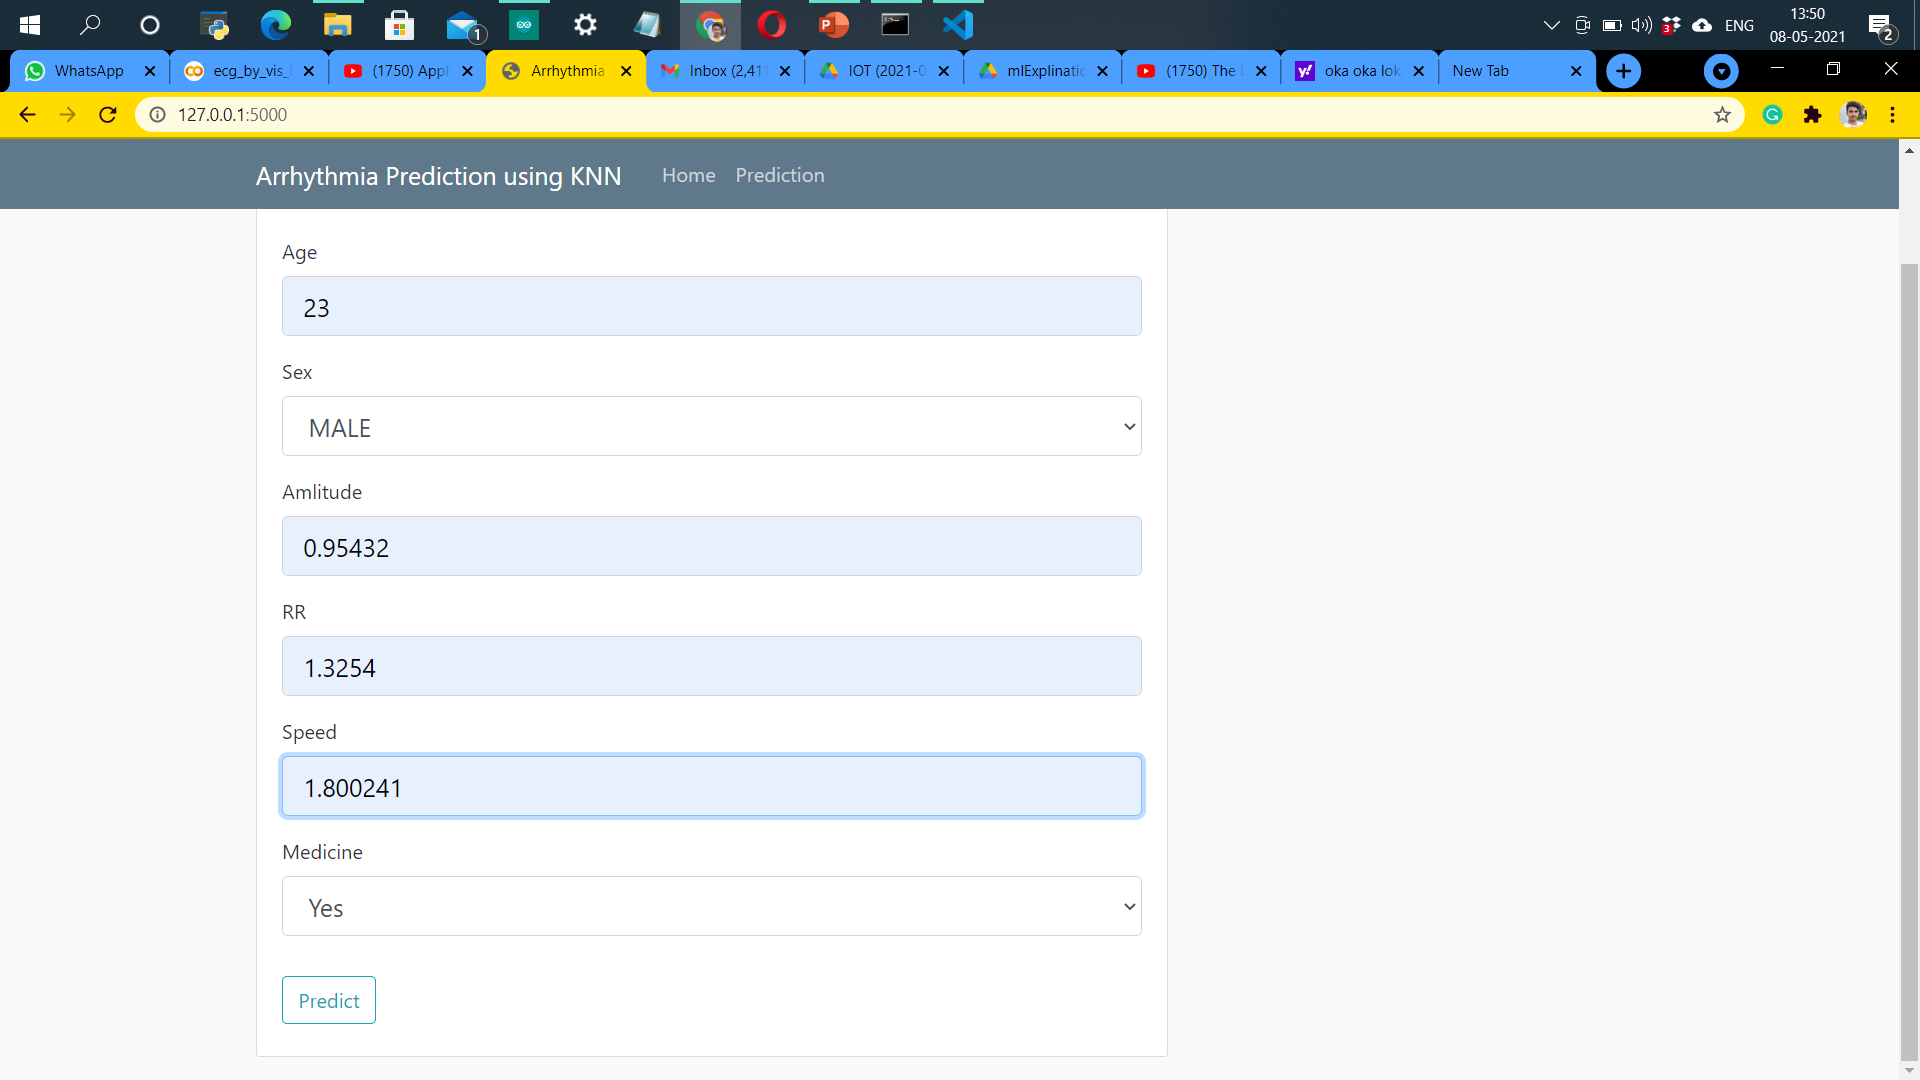

After clicking the predict button in first page it will predict the disease that the patient may come with the help of KNN regression

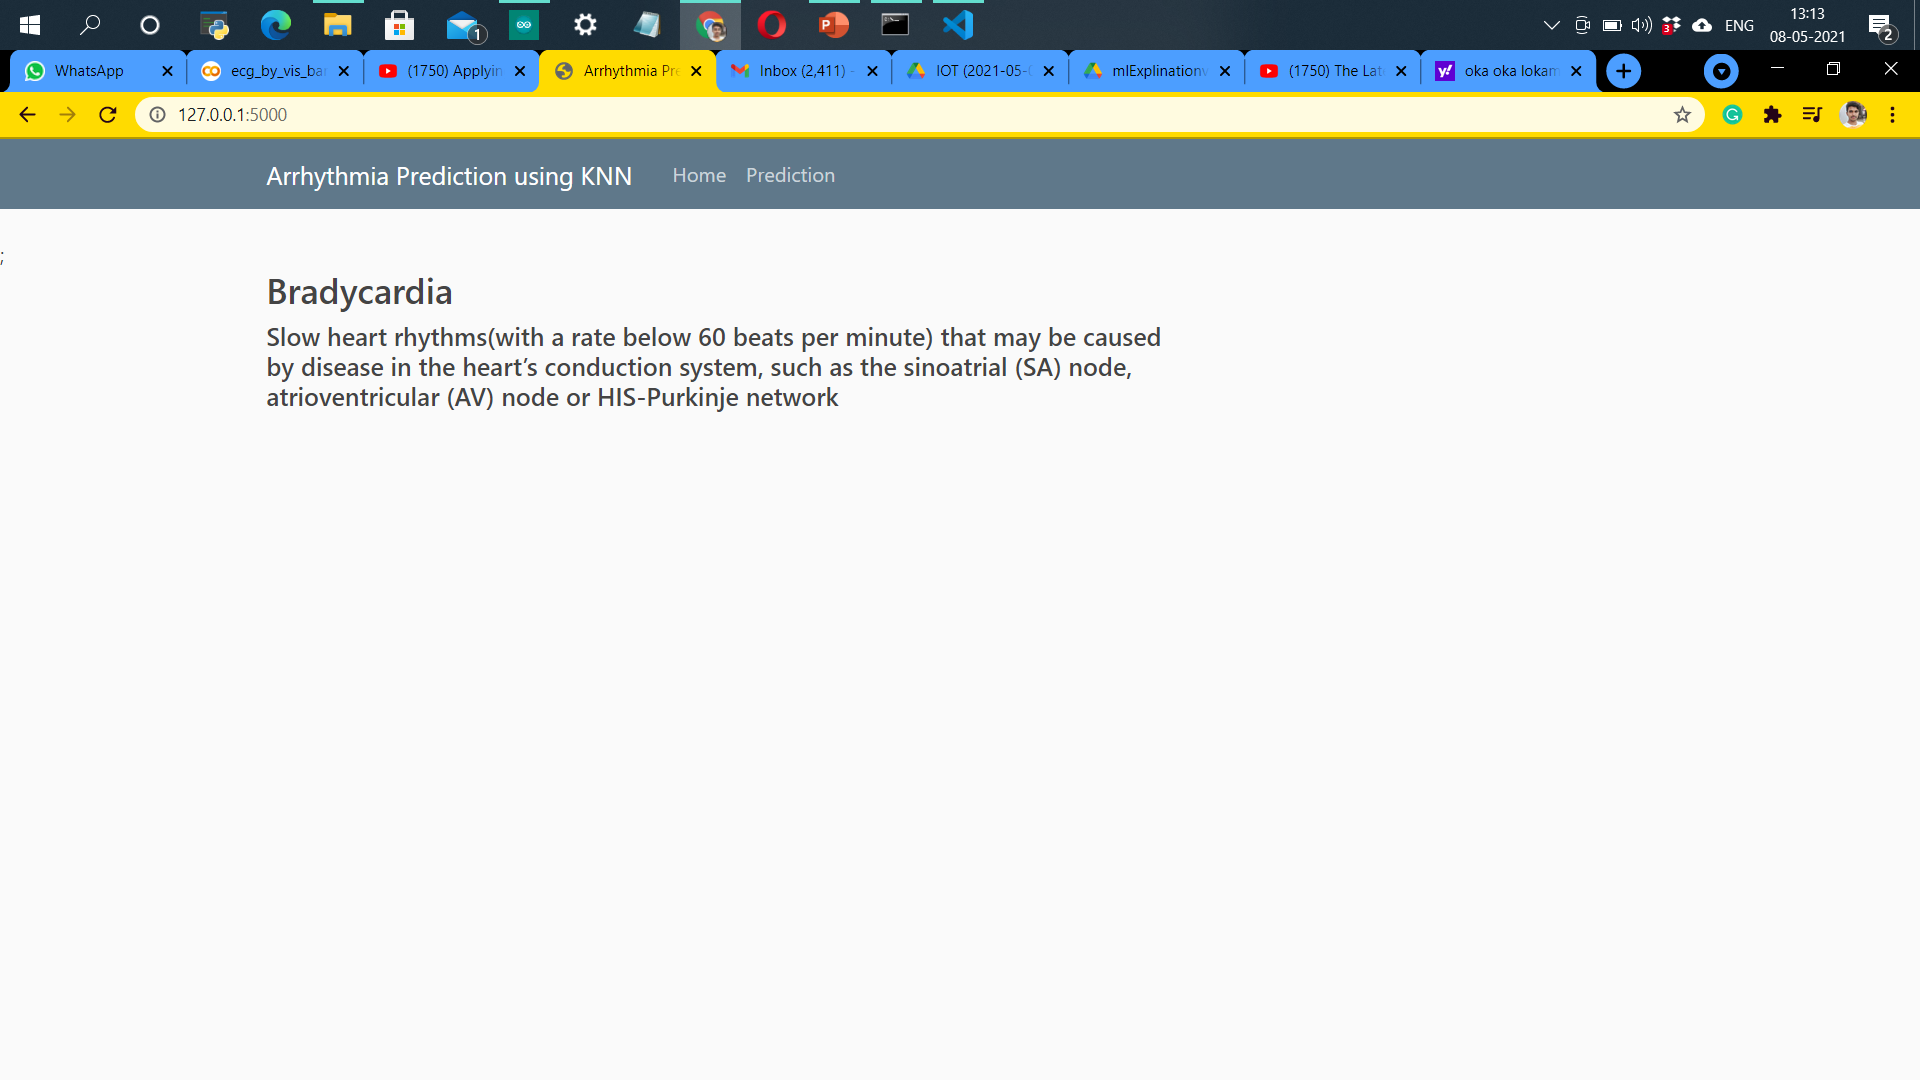